In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [4]:
from urbanstats.website_data.colors import compute_search_flag
from urbanstats.geometry.shapefiles.shapefiles_list import shapefiles
from urbanstats.geometry.relationship import ordering_idx as type_ordering_idx

/home/kavi/anaconda3/envs/urbanstats/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [5]:
pad = 10
all_images = [np.array(compute_search_flag(sh)) for sh in sorted(shapefiles.values(), key=lambda x: type_ordering_idx[x.meta['type']])]
img_height, img_width, channels = all_images[0].shape
nrows = int((len(all_images) * 2) ** 0.5)
ncols = (len(all_images) + nrows - 1) // nrows
tiled = np.zeros(((img_height + 2 * pad) * nrows, (img_width + 2 * pad) * ncols, channels), dtype=all_images[0].dtype) + 255
for row in range(nrows):
    for col in range(ncols):
        y, x = row * (img_height + 2 * pad) + pad, col * (img_width + 2 * pad) + pad
        tiled[y:y+img_height, x:x+img_width] = all_images.pop(0)

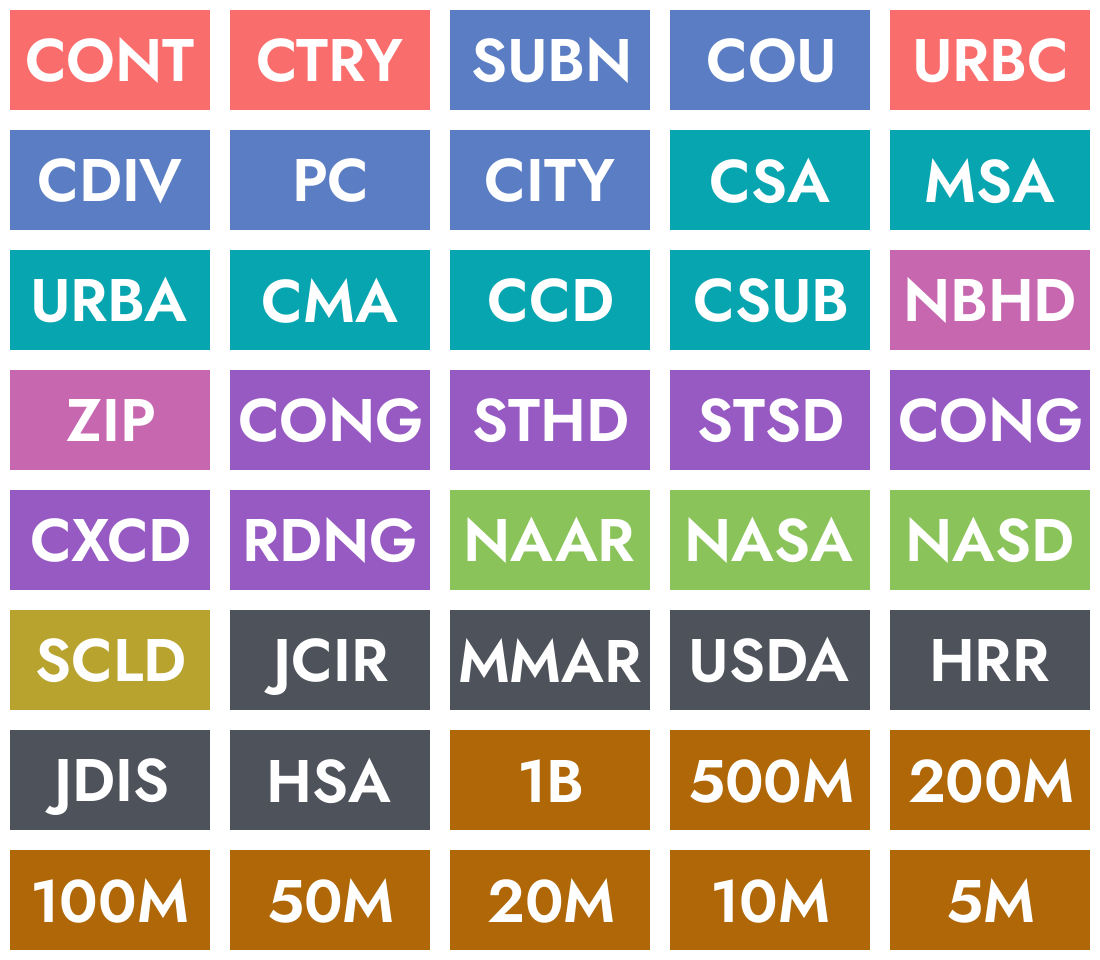

In [6]:
Image.fromarray(tiled)